Question 3

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

grades_data = []
with open("my_grades.txt", "r") as f:
    lines = f.readlines()
    # Assuming the first line is the name and subsequent lines are grades
    name = lines[0].strip()
    student_grades = {'Name': name}
    for line in lines[1:]:
        match = re.match(r"(\w+): (\d+)", line.strip())
        if match:
            subject, grade = match.groups()
            student_grades[subject] = int(grade)
    grades_data.append(student_grades)

df = pd.DataFrame(grades_data)

display(df)

,Name,Math,Science,English,History,Art
0,Nana Prempeh,85,92,78,88,95


Question 1

In [ ]:
%%writefile my_grades.txt


Writing my_grades.txt


In [ ]:
with open("my_grades.txt", "w") as f:
    f.write("Nana Prempeh\n")
    f.write("Math: 85\nScience: 92\nEnglish: 78\nHistory: 88\nArt: 95\n")


with open("my_grades.txt", "r") as f:
    contents = f.readlines()
    for line in contents:
        print(line.strip())

grades = [85, 92, 78, 88, 95]
average = sum(grades) / len(grades)
print(f"Average Grade: {average:.1f}")

Nana Prempeh
Math: 85
Science: 92
English: 78
History: 88
Art: 95
Average Grade: 87.6


Question 2

In [ ]:
class Student:
    def __init__(self, name, age, grades):
        self.name = name
        self.age = age
        self.grades = grades

    def add_grade(self, grade):
        self.grades.append(grade)

    def get_average(self):
        return sum(self.grades) / len(self.grades)

    def get_letter_grade(self):
        avg = self.get_average()
        if avg >= 90: return 'A'
        elif avg >= 80: return 'B'
        elif avg >= 70: return 'C'
        elif avg >= 60: return 'D'
        else: return 'F'

student = Student("Alice", 16, [85, 90, 78])
student.add_grade(88)
print(f"Average: {student.get_average():.1f}")
print(f"Letter Grade: {student.get_letter_grade()}")




Average: 85.2
Letter Grade: B


Question 4


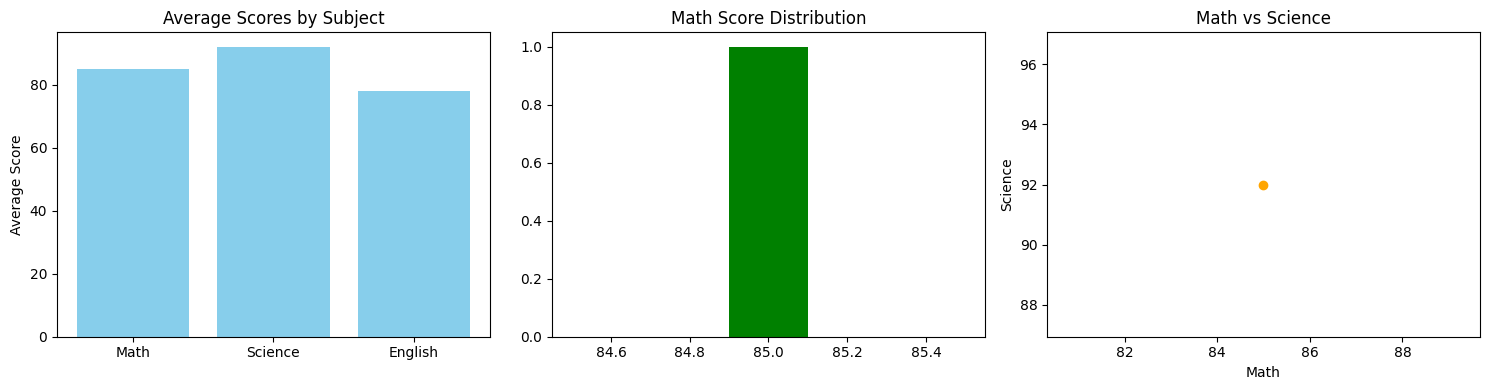

In [ ]:
import matplotlib.pyplot as plt

avg_scores = df[['Math', 'Science', 'English']].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Bar Chart
axs[0].bar(avg_scores.index, avg_scores.values, color='skyblue')
axs[0].set_title("Average Scores by Subject")
axs[0].set_ylabel("Average Score")

# Histogram
axs[1].hist(df['Math'], bins=5, color='green')
axs[1].set_title("Math Score Distribution")

# Scatter Plot
axs[2].scatter(df['Math'], df['Science'], color='orange')
axs[2].set_title("Math vs Science")
axs[2].set_xlabel("Math")
axs[2].set_ylabel("Science")

plt.tight_layout()
plt.show()

question 5

In [ ]:
print("\nStudents with Math > 85:\n", df[df['Math'] > 85])
print("\nStudents with >80 in all subjects:\n", df[(df['Math'] > 80) & (df['Science'] > 80) & (df['English'] > 80)])

df["Total_Score"] = df["Math"] + df["Science"] + df["English"]
sorted_df = df.sort_values("Total_Score", ascending=False)
print("\nSorted by Total Score:\n", sorted_df)


Students with Math > 85:
 Empty DataFrame
Columns: [Name, Math, Science, English, History, Art]
Index: []

Students with >80 in all subjects:
 Empty DataFrame
Columns: [Name, Math, Science, English, History, Art]
Index: []

Sorted by Total Score:
            Name  Math  Science  English  History  Art  Total_Score
0  Nana Prempeh    85       92       78       88   95          255


Question 6

In [ ]:
def analyze_subject(df, subject):
    print(f"\n--- {subject} Analysis ---")
    scores = df[subject]
    print("Max:", scores.max())
    print("Min:", scores.min())
    print("Average:", scores.mean())
    print("Above 80:", (scores > 80).sum())

# Test
analyze_subject(df, "Math")


--- Math Analysis ---
Max: 85
Min: 85
Average: 85.0
Above 80: 1


Question 7

In [ ]:
def get_letter(avg):
    if avg >= 90: return 'A'
    elif avg >= 80: return 'B'
    elif avg >= 70: return 'C'
    elif avg >= 60: return 'D'
    else: return 'F'

df["Average_Score"] = df[["Math", "Science", "English"]].mean(axis=1)
df["Letter_Grade"] = df["Average_Score"].apply(get_letter)

df[["Name", "Average_Score", "Letter_Grade"]].to_csv("student_report.csv", index=False)

# Summary
class_avg = df["Average_Score"].mean()
grade_counts = df["Letter_Grade"].value_counts()

with open("class_summary.txt", "w") as f:
    f.write(f"Total Students: {len(df)}\n")
    f.write(f"Class Average: {class_avg:.1f}\n")
    f.write("Grade Counts:\n")
    f.write(grade_counts.to_string())

question 8